In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
df_students = pd.read_csv("students_raw.csv")
df_classes = pd.read_excel("classes.xlsx", sheet_name="LopKhoa")
with open("students_extra.json", "r", encoding="utf-8") as f:
    extra = json.load(f)
df_extra = pd.json_normalize(extra)
df_students.head()

FileNotFoundError: [Errno 2] No such file or directory: 'students_raw.csv'

In [ ]:
df_students.info()
df_students.describe()
df_students.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MaSV        50 non-null     object 
 1   Lop         50 non-null     object 
 2   GioiTinh    50 non-null     object 
 3   DiemGiuaKy  45 non-null     float64
 4   DiemCuoiKy  45 non-null     float64
dtypes: float64(2), object(3)
memory usage: 2.1+ KB


,0
MaSV,0
Lop,0
GioiTinh,0
DiemGiuaKy,5
DiemCuoiKy,5


In [ ]:
# 2. Khám phá dữ liệu sơ bộ
print("Thông tin df_students:")
print(df_students.info())
print("\nMô tả thống kê df_students:")
print(df_students.describe())
print("\nSố giá trị thiếu df_students:")
print(df_students.isna().sum())

Thông tin df_students:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MaSV        50 non-null     object 
 1   Lop         50 non-null     object 
 2   GioiTinh    50 non-null     object 
 3   DiemGiuaKy  45 non-null     float64
 4   DiemCuoiKy  45 non-null     float64
dtypes: float64(2), object(3)
memory usage: 2.1+ KB
None

Mô tả thống kê df_students:
       DiemGiuaKy  DiemCuoiKy
count   45.000000   45.000000
mean     6.357778    6.891111
std      2.241701    2.359008
min     -2.000000    3.000000
25%      5.400000    5.200000
50%      6.400000    6.700000
75%      8.000000    8.000000
max      9.600000   15.000000

Số giá trị thiếu df_students:
MaSV          0
Lop           0
GioiTinh      0
DiemGiuaKy    5
DiemCuoiKy    5
dtype: int64


In [ ]:
print("\nThông tin df_classes:")
print(df_classes.info())
print("\nSố giá trị thiếu df_classes:")
print(df_classes.isna().sum())


Thông tin df_classes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Lop     4 non-null      object
 1   Khoa    4 non-null      object
dtypes: object(2)
memory usage: 196.0+ bytes
None

Số giá trị thiếu df_classes:
Lop     0
Khoa    0
dtype: int64


In [ ]:
print("\nThông tin df_extra:")
print(df_extra.info())
print("\nSố giá trị thiếu df_extra:")
print(df_extra.isna().sum())


Thông tin df_extra:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MaSV     50 non-null     object
 1   CLB      50 non-null     object
 2   HocBong  50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB
None

Số giá trị thiếu df_extra:
MaSV       0
CLB        0
HocBong    0
dtype: int64


In [ ]:
# 3. Tiền xử lý dữ liệu

# Chuẩn hóa cột 'Lop' (xóa khoảng trắng, viết hoa, bỏ khoảng trắng trong chuỗi)
df_students['Lop'] = df_students['Lop'].astype(str).str.strip().str.upper().str.replace(" ", "")

In [ ]:
# Chuẩn hóa cột 'GioiTinh'
df_students['GioiTinh'] = df_students['GioiTinh'].astype(str).str.lower().map({
    'nam':'Nam','male':'Nam','m':'Nam',
    'nữ':'Nữ','nu':'Nữ','female':'Nữ','f':'Nữ'
})

In [ ]:
# Xử lý giá trị thiếu ở cột 'DiemCuoiKy' theo median từng lớp
df_students['DiemCuoiKy'] = df_students.groupby('Lop')['DiemCuoiKy'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# Áp dụng forward fill cho những chỗ còn NA
df_students['DiemCuoiKy'] = df_students['DiemCuoiKy'].fillna(method='ffill')

/tmp/ipython-input-383472200.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_students['DiemCuoiKy'] = df_students['DiemCuoiKy'].fillna(method='ffill')


In [ ]:
# Loại bỏ dữ liệu trùng lặp
df_students = df_students.drop_duplicates()

In [ ]:
# Phát hiện và xử lý outlier ở cột điểm (lọc điểm hợp lệ từ 0 đến 10)
df_students = df_students[df_students['DiemCuoiKy'].between(0, 10)]

In [ ]:
# Nếu có cột ngày tháng 'NgaySinh', chuẩn hóa sang datetime và tách ra cột 'Nam', 'Thang'
if 'NgaySinh' in df_students.columns:
    df_students['NgaySinh'] = pd.to_datetime(df_students['NgaySinh'], errors='coerce')
    df_students['Nam'] = df_students['NgaySinh'].dt.year
    df_students['Thang'] = df_students['NgaySinh'].dt.month

In [ ]:
# 4. Kết hợp dữ liệu từ 3 nguồn bằng merge
df_final = df_students.merge(df_classes, on='Lop', how='left')
df_final = df_final.merge(df_extra, on='MaSV', how='left')

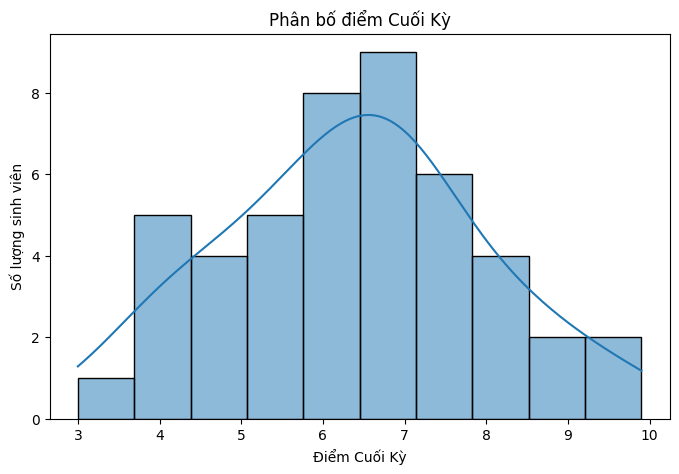

In [ ]:
# 5. Mini EDA

# Histogram phân bố điểm 'DiemCuoiKy'
plt.figure(figsize=(8,5))
sns.histplot(df_final['DiemCuoiKy'], bins=10, kde=True)
plt.title("Phân bố điểm Cuối Kỳ")
plt.xlabel("Điểm Cuối Kỳ")
plt.ylabel("Số lượng sinh viên")
plt.show()

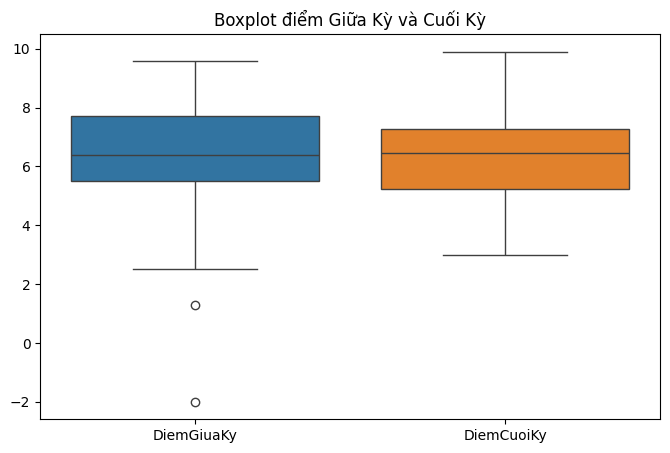

In [ ]:
# Boxplot điểm 'DiemGiuaKy' và 'DiemCuoiKy' để quan sát outlier
plt.figure(figsize=(8,5))
sns.boxplot(data=df_final[['DiemGiuaKy','DiemCuoiKy']])
plt.title("Boxplot điểm Giữa Kỳ và Cuối Kỳ")
plt.show()

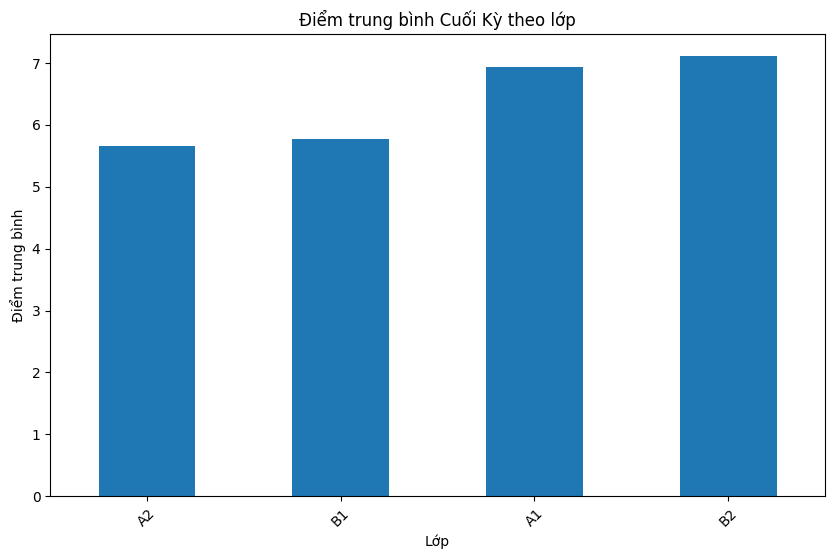

In [ ]:
# Tính điểm trung bình theo từng lớp và vẽ biểu đồ cột
mean_scores = df_final.groupby('Lop')['DiemCuoiKy'].mean().sort_values()
plt.figure(figsize=(10,6))
mean_scores.plot(kind='bar')
plt.title("Điểm trung bình Cuối Kỳ theo lớp")
plt.xlabel("Lớp")
plt.ylabel("Điểm trung bình")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 6. Lưu dữ liệu đã làm sạch vào file students_clean.csv
df_final.to_csv("students_clean.csv", index=False)

print("Đã lưu file students_clean.csv thành công.")


Đã lưu file students_clean.csv thành công.
